When we use Student's T test for samples from other than normal distributions or use classic formula for Mean Confidence Interval -> we assume that sample means distributed normally if we have enough sample size. Let's research that aspect in practice

In [90]:
import scipy.stats as sps
import seaborn as sns
import numpy as np

from statsmodels.stats.proportion import proportion_confint

In [100]:
def check_for_ttest_applicability(distribution, sample_size, iters):
    """Simple AA test MonteCarlo with Students Test"""
    # Generate Samples
    control = distribution.rvs([monte_carlo_iters, sample_size])
    test = distribution.rvs([monte_carlo_iters, sample_size])
    control_sample_means = np.mean(control, axis=1)
    
    # FPR for t test check
    false_positives= np.sum(sps.ttest_ind(test, control, axis=1).pvalue <= 0.05)
    false_positive_rate = false_positives / monte_carlo_iters
    ci_fpr = proportion_confint(false_positives, nobs=monte_carlo_iters, method='wilson')
    
    # Results: 
    print(f"False Positive Rate for T-test = {false_positive_rate}, with CI {ci_fpr}")
    sns.displot(data=control[0])
    sns.displot(control_sample_means, color='orange') 

False Positive Rate for T-test = 0.0497, with CI (0.0456107427311713, 0.05413508620146003)


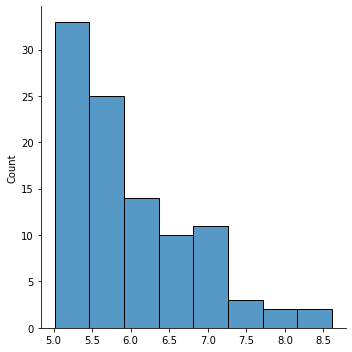

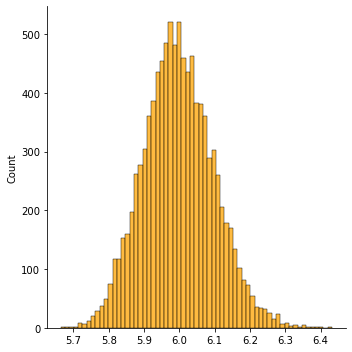

In [102]:
distribution = sps.expon(5)
monte_carlo_iters = int(1e4)
sample_size = int(1e2)

check_for_ttest_applicability(distribution, sample_size, monte_carlo_iters)

False Positive Rate for T-test = 0.0516, with CI (0.047433804428009554, 0.05611056531081321)


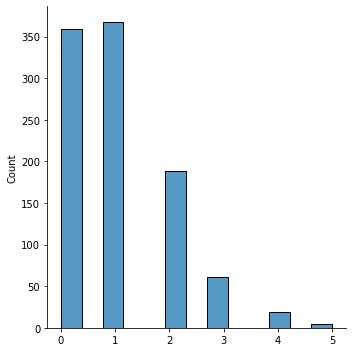

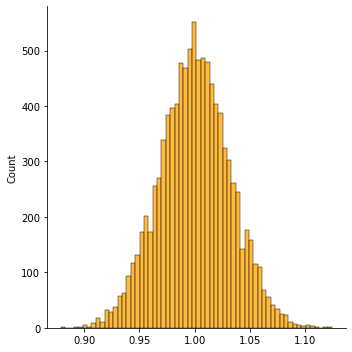

In [ ]:
distribution = sps.poisson(1)
monte_carlo_iters = int(1e4)
sample_size = int(1e3)

check_for_ttest_applicability(distribution, sample_size, monte_carlo_iters)

False Positive Rate for T-test = 0.0461, with CI (0.0421613141098896, 0.050387279611010596)


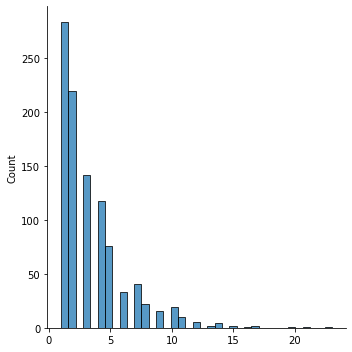

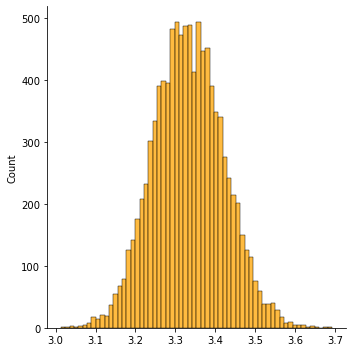

In [105]:
distribution = sps.geom(0.3)
monte_carlo_iters = int(1e4)
sample_size = int(1e3)

check_for_ttest_applicability(distribution, sample_size, monte_carlo_iters)